In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df1 = pd.read_csv("heart.csv")
df2 = pd.read_csv("AirQuality.csv",sep = ";")

In [4]:
df2.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


# Data Cleaning

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
Age               918 non-null int64
Sex               918 non-null object
ChestPainType     918 non-null object
RestingBP         918 non-null int64
Cholesterol       918 non-null int64
FastingBS         918 non-null int64
RestingECG        918 non-null object
MaxHR             918 non-null int64
ExerciseAngina    918 non-null object
Oldpeak           918 non-null float64
ST_Slope          918 non-null object
HeartDisease      918 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 68.2+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(10), object(7)
memory usage: 998.9+ KB


In [7]:
df2.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [8]:
df1.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df2.drop(["Unnamed: 15","Unnamed: 16"],axis =1, inplace = True)

In [10]:
df2.sample(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
8302,19/02/2005,16.00.00,"1,1",988.0,-200.0,"3,4",679.0,144.0,905.0,117.0,911.0,595.0,"12,8","31,9","0,4684"
526,01/04/2004,16.00.00,"2,3",-200.0,319.0,"-200,0",-200.0,131.0,-200.0,93.0,-200.0,-200.0,-200,-200,-200
304,23/03/2004,10.00.00,"3,4",1343.0,340.0,"16,2",1185.0,237.0,760.0,132.0,1857.0,1311.0,"12,0","62,9","0,8803"
2078,05/06/2004,08.00.00,"1,5",983.0,-200.0,"8,0",901.0,187.0,954.0,96.0,1691.0,986.0,"20,9","54,8","1,3387"
8548,01/03/2005,22.00.00,"1,0",808.0,-200.0,"2,4",613.0,165.0,1137.0,116.0,672.0,543.0,"0,6","34,1","0,2210"
7192,04/01/2005,10.00.00,"3,1",-200.0,-200.0,"-200,0",-200.0,480.0,-200.0,171.0,-200.0,-200.0,-200,-200,-200
4649,20/09/2004,11.00.00,"3,7",1262.0,-200.0,"18,6",1258.0,425.0,597.0,174.0,1835.0,1484.0,"29,9","34,0","1,4096"
2760,03/07/2004,18.00.00,"1,2",929.0,-200.0,"7,3",869.0,80.0,942.0,89.0,1454.0,624.0,"35,3","17,0","0,9561"
3624,08/08/2004,18.00.00,1,926.0,-200.0,"5,0",763.0,41.0,949.0,54.0,1491.0,504.0,"33,8","32,1","1,6596"
4908,01/10/2004,06.00.00,"1,6",1124.0,-200.0,"9,8",972.0,279.0,674.0,69.0,1568.0,1092.0,"18,8","71,8","1,5372"


In [11]:
df2.dropna(inplace = True)

In [12]:
df2.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


In [13]:
df2.drop_duplicates()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848"
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603"
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702"
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648"
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517"


In [14]:
df1.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
Age               918 non-null int64
Sex               918 non-null object
ChestPainType     918 non-null object
RestingBP         918 non-null int64
Cholesterol       918 non-null int64
FastingBS         918 non-null int64
RestingECG        918 non-null object
MaxHR             918 non-null int64
ExerciseAngina    918 non-null object
Oldpeak           918 non-null float64
ST_Slope          918 non-null object
HeartDisease      918 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 68.2+ KB


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
dtypes: float64(8), object(7)
memory usage: 913.8+ KB


# Data Transformation

In [17]:
df2.replace(",", ".", regex=True, inplace=True)

In [18]:
df2.drop(["Date","Time"] ,axis =1 , inplace = True)

In [19]:
df2.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [20]:
df2.dtypes

CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [21]:
df2 = df2.astype("float64")

In [22]:
df2.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [23]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [24]:
df1.Sex.replace(["M","F"],[1,0] , inplace =True)

In [25]:
df1.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [26]:
df1.ChestPainType.replace(["ASY","NAP","ATA", "TA"],[0,1,2,3] ,inplace =True)

In [27]:
df1.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [28]:
df1.RestingECG.replace(["Normal","ST","LVH"],[0,1,2], inplace=True)

In [29]:
df1.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [30]:
df1.ExerciseAngina.replace(["N","Y"],[0,1] , inplace =True)

In [31]:
df1.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [32]:
df1.ST_Slope.replace(["Flat","Up","Down"],[0,1,2], inplace=True)

In [33]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,1,160,180,0,0,156,0,1.0,0,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,0,138,214,0,0,108,1,1.5,0,1
4,54,1,1,150,195,0,0,122,0,0.0,1,0


# Data Integration

In [34]:
df1.shape

(918, 12)

In [35]:
df2.shape

(9357, 13)

In [36]:
final_df = pd.concat([df2.iloc[:800,:], df1.iloc[:800,:]], axis=1)
final_df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,...,2,140,289,0,0,172,0,0.0,1,0
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,...,1,160,180,0,0,156,0,1.0,0,1
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,...,2,130,283,0,1,98,0,0.0,1,0
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,...,0,138,214,0,0,108,1,1.5,0,1
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,...,1,150,195,0,0,122,0,0.0,1,0
5,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,...,1,120,339,0,0,170,0,0.0,1,0
6,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,...,2,130,237,0,0,170,0,0.0,1,0
7,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,...,2,110,208,0,0,142,0,0.0,1,0
8,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,...,0,140,207,0,0,130,1,1.5,0,1
9,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,...,2,120,284,0,0,120,0,0.0,1,0


In [37]:
final_df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'Age', 'Sex', 'ChestPainType', 'RestingBP',
       'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina',
       'Oldpeak', 'ST_Slope', 'HeartDisease'],
      dtype='object')

In [38]:
import seaborn as sns

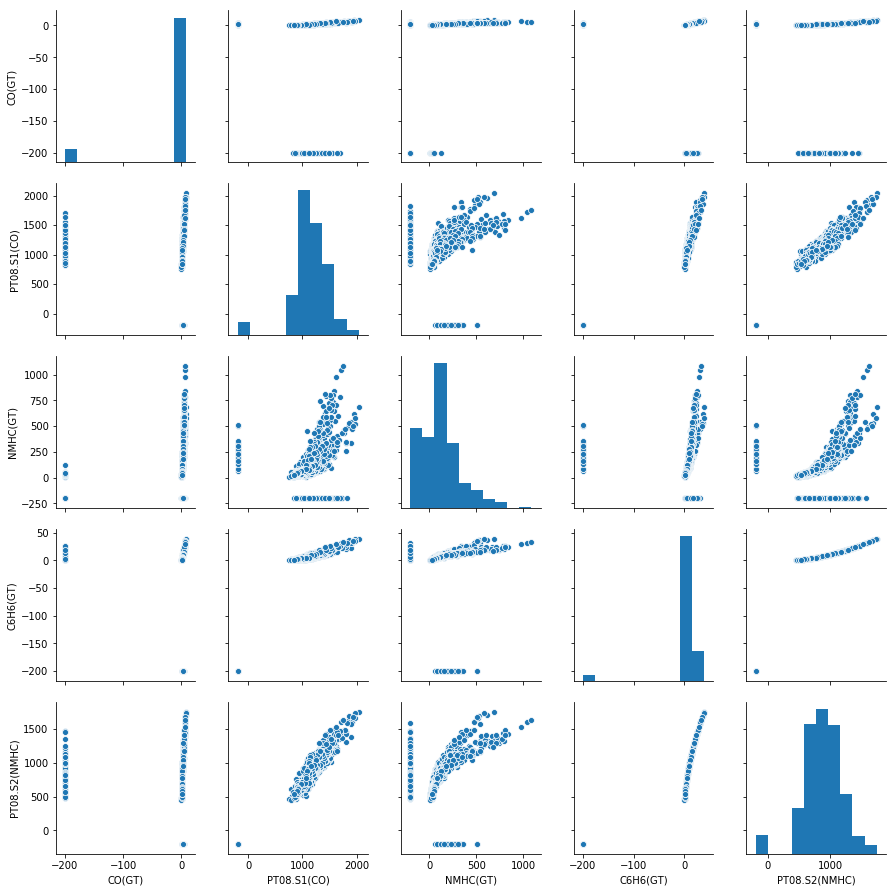

In [39]:
sns.pairplot(final_df.iloc[:,:5])

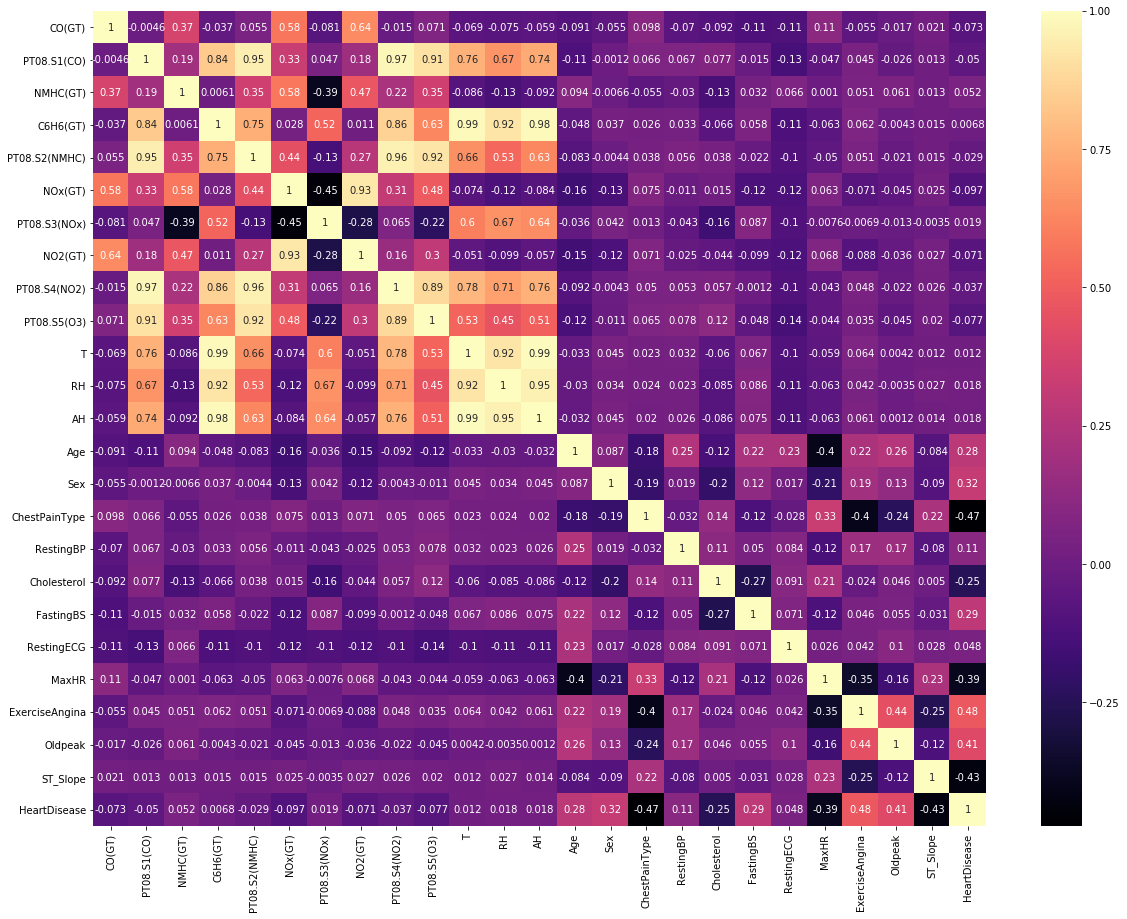

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sns.heatmap(final_df.corr(), annot=True, cmap="magma")
plt.show()

# Model

In [41]:
X = final_df.drop(["HeartDisease"] , axis =1 )

In [42]:
y = final_df.HeartDisease

In [43]:
X

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,...,1,2,140,289,0,0,172,0,0.0,1
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,...,0,1,160,180,0,0,156,0,1.0,0
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,...,1,2,130,283,0,1,98,0,0.0,1
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,...,0,0,138,214,0,0,108,1,1.5,0
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,...,1,1,150,195,0,0,122,0,0.0,1
5,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,...,1,1,120,339,0,0,170,0,0.0,1
6,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,...,0,2,130,237,0,0,170,0,0.0,1
7,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,...,1,2,110,208,0,0,142,0,0.0,1
8,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,...,1,0,140,207,0,0,130,1,1.5,0
9,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,...,0,2,120,284,0,0,120,0,0.0,1


In [44]:
y

0      0
1      1
2      0
3      1
4      0
5      0
6      0
7      0
8      1
9      0
10     0
11     1
12     0
13     1
14     0
15     0
16     1
17     0
18     1
19     1
20     0
21     0
22     0
23     1
24     0
25     0
26     0
27     0
28     0
29     0
      ..
770    0
771    1
772    0
773    0
774    1
775    1
776    1
777    0
778    1
779    0
780    0
781    0
782    0
783    0
784    1
785    0
786    1
787    1
788    0
789    0
790    1
791    1
792    1
793    1
794    0
795    0
796    1
797    1
798    0
799    0
Name: HeartDisease, Length: 800, dtype: int64

In [45]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2, random_state=7)

model = LogisticRegression()
model.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
final_pred=model.predict(Xtest)
final_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0], dtype=int64)

In [47]:
pd.DataFrame({"Actual":ytest, "Predict":final_pred})

,Actual,Predict
61,0,0
799,0,0
747,0,0
668,0,0
726,0,0
110,0,0
389,1,1
464,1,1
34,0,0
244,1,1


In [48]:
print("Accuracy of the Logistics Regression Model is ::",accuracy_score(ytest, final_pred)*100, "%")

Accuracy of the Logistics Regression Model is :: 85.625 %
